In [6]:
from constants import match_ids
from async_main import get_matches
import asyncio
from helper import sort_by_minute
from collections import defaultdict
import itertools

In [4]:
matches = await get_matches(match_ids=match_ids)

('Not goal: ', "Emerson Royal 62' Red Card")


In [16]:
goals_sort_by_minute = sorted(
    [event for match in matches for event in match.events],
    key=sort_by_minute
)

goals_dict = defaultdict(list)
for minute, group in itertools.groupby(goals_sort_by_minute, key=lambda goal: goal.minute):
    goals_dict[minute]=list(group)

<BarContainer object of 62 artists>

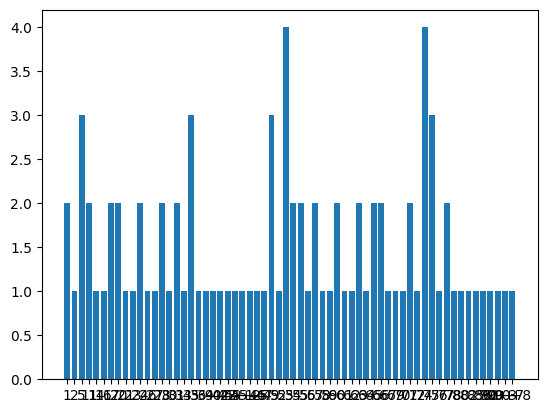

In [17]:
keys = goals_dict.keys()
vals = [len(val) for val in goals_dict.values()]
import matplotlib.pyplot as plt
plt.bar(keys, vals)


In [30]:
first_15_mins = (1, 16)
last_15_mins = (75, 91)

df = defaultdict(int)

for minute, goal in home_goals_dict.items():
    if "+" in minute:
        x, y = minute.split("+")
        minute = Decimal(".".join([x, y]))
    else:
        minute = int(minute)
    if minute > first_15_mins[0] and minute < first_15_mins[1]:
        df["first_15_mins"] += len(goal)
    elif minute > last_15_mins[0] and minute < last_15_mins[1]:
        df["last_15_mins"] += len(goal)
    else:
        df["remaining"] += len(goal)
df

defaultdict(int, {'remaining': 30, 'first_15_mins': 1, 'last_15_mins': 7})

<BarContainer object of 3 artists>

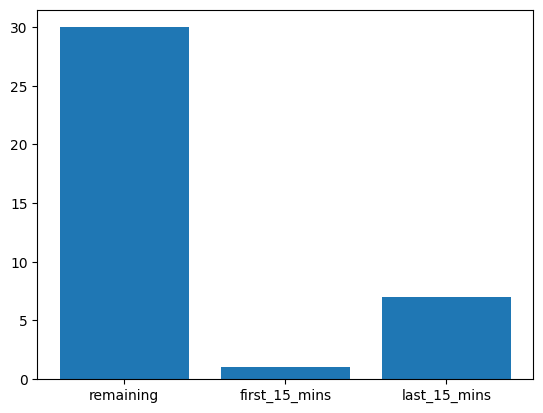

In [31]:
plt.bar(df.keys(), df.values())

[[Goal(match='75001', minute='76', scorer='Bukayo Saka ', assist='')],
 [Goal(match='74951', minute='77', scorer='Gabriel Martinelli ', assist='')],
 [Goal(match='75041', minute='78', scorer='Martin ', assist='')],
 [Goal(match='74971', minute='80', scorer='Gabriel Martinelli ', assist='')],
 [Goal(match='74941', minute='86', scorer='Gabriel Magalh', assist='')],
 [Goal(match='75111', minute='90', scorer='Eddie Nketiah ', assist='')],
 [Goal(match='75161', minute='90+7', scorer='Reiss Nelson ', assist='')]]

<BarContainer object of 3 artists>

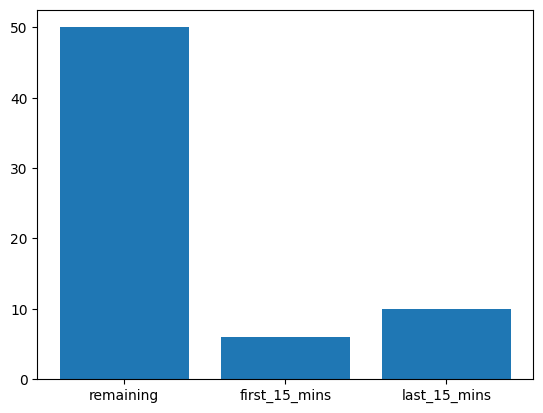

In [34]:
total_goals = home_goals + away_goals
sorted_total_goals = sorted(total_goals, key=sort_by_minute)
total_goals_dict = defaultdict(list)
for minute, group in itertools.groupby(sorted_total_goals, key=lambda goal: goal.minute):
    total_goals_dict[minute]=list(group)

first_15_mins = (1, 16)
last_15_mins = (75, 91)

df = defaultdict(int)

for minute, goal in total_goals_dict.items():
    if "+" in minute:
        x, y = minute.split("+")
        minute = Decimal(".".join([x, y]))
    else:
        minute = int(minute)
    if minute > first_15_mins[0] and minute < first_15_mins[1]:
        df["first_15_mins"] += len(goal)
    elif minute > last_15_mins[0] and minute < last_15_mins[1]:
        df["last_15_mins"] += len(goal)
    else:
        df["remaining"] += len(goal)

import matplotlib.pyplot as plt
plt.bar(df.keys(), df.values())